In [1]:
import tensorflow as tf

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 63s 4us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i - 3,'?') for i in train_data[0])

1646592/1641221 [==============================] - 10s 6us/step


In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i - 3,'?') for i in train_data[0])

In [14]:
import numpy as np 


In [19]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
#Building the network
from keras import models

In [23]:
from keras import layers

In [24]:
model = models.Sequential()

In [25]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [29]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.5158 - acc: 0.7783 - val_loss: 0.3884 - val_acc: 0.8685
Epoch 2/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.3086 - acc: 0.9030 - val_loss: 0.3292 - val_acc: 0.8686
Epoch 3/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.2257 - acc: 0.9251 - val_loss: 0.2811 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1799 - acc: 0.9403 - val_loss: 0.2751 - val_acc: 0.8912
Epoch 5/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1457 - acc: 0.9537 - val_loss: 0.2824 - val_acc: 0.8890
Epoch 6/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.1159 - acc: 0.9637 - val_loss: 0.2955 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.0943 - acc: 0.9718 - val_loss: 0.3158 - val_ac

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [32]:
import matplotlib.pyplot as plt

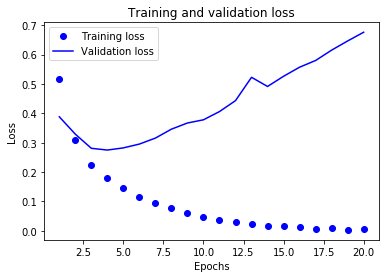

In [34]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
plt.clf()

In [40]:
acc_values = history_dict['acc']

In [42]:
val_acc_values = history_dict['val_acc']

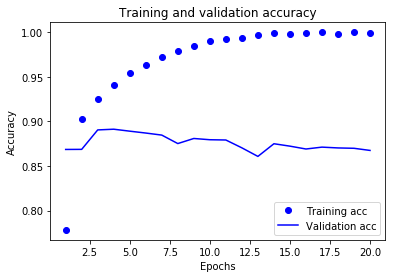

In [46]:
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
model = models.Sequential()

In [48]:
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.4454 - accuracy: 0.8270
Epoch 2/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.2618 - accuracy: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.2042 - accuracy: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


In [51]:
print(results)

[0.308932580909729, 0.877240002155304]


In [53]:
print(model.predict(x_test))

[[0.26672286]
 [0.998757  ]
 [0.94577235]
 ...
 [0.17473155]
 [0.09862044]
 [0.81931543]]
